# Hospital Data Visualization 3

## Importing required libraries

In [199]:
# Library for modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

# Library to see the training models
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
# look at the first ten thousand bytes to guess the character encoding
with open('033.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## Reading the Data

In [200]:
df=pd.read_csv('033.csv',encoding='ISO-8859-1',sep=';')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55515 entries, 0 to 55514
Data columns (total 9 columns):
PATIENT ID                        55515 non-null int64
CONSTANTS_ING/INPAT_FECHA/DATE    55515 non-null object
CONSTANTS_ING/INPAT_HORA/TIME     55515 non-null object
FC/HR_ING/INPAT                   55515 non-null int64
GLU/GLY_ING/INPAT                 55515 non-null int64
SAT_02_ING/INPAT                  55515 non-null int64
TA_MAX_ING/INPAT                  55515 non-null int64
TA_MIN_ING/INPAT                  55515 non-null int64
TEMP_ING/INPAT                    55515 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 3.8+ MB


## Checking the Data

In [202]:
df.describe()

PATIENT ID  FC/HR_ING/INPAT  GLU/GLY_ING/INPAT  SAT_02_ING/INPAT  \
count  55515.000000     55515.000000            55515.0           55515.0   
mean    1159.716275        53.067874                0.0               0.0   
std      663.959042        38.335919                0.0               0.0   
min        1.000000         0.000000                0.0               0.0   
25%      586.000000         0.000000                0.0               0.0   
50%     1152.000000        69.000000                0.0               0.0   
75%     1742.000000        81.000000                0.0               0.0   
max     2321.000000       914.000000                0.0               0.0   

       TA_MAX_ING/INPAT  TA_MIN_ING/INPAT  TEMP_ING/INPAT  
count      55515.000000      55515.000000    55515.000000  
mean          47.096118         26.984563       35.573782  
std           61.194591         35.197598        5.071754  
min            0.000000          0.000000        0.000000  
25%            0.000000          0.000000       35.800000  
50%            0.000000          0.000000       36.200000  
75%          114.000000         65.000000       36.600000  
max          222.000000        178.000000       40.500000

In [203]:
#Values NaN
df.isnull().sum().sort_values(ascending=False)

TEMP_ING/INPAT                    0
TA_MIN_ING/INPAT                  0
TA_MAX_ING/INPAT                  0
SAT_02_ING/INPAT                  0
GLU/GLY_ING/INPAT                 0
FC/HR_ING/INPAT                   0
CONSTANTS_ING/INPAT_HORA/TIME     0
CONSTANTS_ING/INPAT_FECHA/DATE    0
PATIENT ID                        0
dtype: int64

In [204]:
#% of 0 in variables
print(df[df == 0].count(axis=0)/len(df.index)*100)

PATIENT ID                          0.000000
CONSTANTS_ING/INPAT_FECHA/DATE      0.000000
CONSTANTS_ING/INPAT_HORA/TIME       0.000000
FC/HR_ING/INPAT                    31.798613
GLU/GLY_ING/INPAT                 100.000000
SAT_02_ING/INPAT                  100.000000
TA_MAX_ING/INPAT                   61.858957
TA_MIN_ING/INPAT                   61.873368
TEMP_ING/INPAT                      1.947221
dtype: float64


## Feature Exploration

In [205]:
cp = df.copy()
# We see that there is data inconsistency on GLU / GLY_ING / INPAT SAT_02_ING / INPAT of 100% of 0
cp.drop(['GLU/GLY_ING/INPAT','SAT_02_ING/INPAT'],axis=1, inplace=True)

In [206]:
# Decide which categorical variables you want to use in model
for col_name in cp.columns:
    if cp[col_name].dtypes == 'object' :
        unique_cat = len(cp[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
                col_name=col_name, unique_cat=unique_cat))

Feature 'CONSTANTS_ING/INPAT_FECHA/DATE' has 99 unique categories
Feature 'CONSTANTS_ING/INPAT_HORA/TIME' has 1430 unique categories


In [207]:
cp.head(15)

PATIENT ID CONSTANTS_ING/INPAT_FECHA/DATE CONSTANTS_ING/INPAT_HORA/TIME  \
0         2316                     2020-04-24                          0:00   
1         2316                     2020-04-24                          0:01   
2         2288                     2020-04-24                          0:04   
3          514                     2020-04-24                          0:09   
4          181                     2020-04-24                          0:10   
5         2109                     2020-04-24                          0:10   
6          498                     2020-04-24                          0:11   
7          420                     2020-04-24                          0:13   
8          862                     2020-04-24                          0:13   
9         1086                     2020-04-24                          0:13   
10        1227                     2020-04-24                          0:14   
11        1673                     2020-04-23                          0:05   
12         475                     2020-04-23                          0:06   
13         898                     2020-04-23                          0:06   
14        2317                     2020-04-23                          0:07   

    FC/HR_ING/INPAT  TA_MAX_ING/INPAT  TA_MIN_ING/INPAT  TEMP_ING/INPAT  
0                62                 0                 0            36.5  
1                69                 0                 0            37.1  
2                94                 0                 0            36.8  
3                 0                 0                 0            35.4  
4                 0                 0                 0            36.4  
5                 0                 0                 0            36.3  
6                 0                 0                 0            35.2  
7                 0                 0                 0            36.4  
8                 0                 0                 0            35.5  
9                 0                 0                 0            36.0  
10                0                 0                 0            35.8  
11                0                 0                 0            36.3  
12                0                 0                 0            36.0  
13                0                 0                 0            37.2  
14                0                 0                 0            35.8

In [208]:
# We read the csv to which we would map to establish a relationship between PATIENT ID and its result DIAG ING / INPAT
#Variable to predict
df=pd.read_csv('01.csv',encoding='ISO-8859-1',sep=';',parse_dates=True,dayfirst=True)

In [209]:
rename_dict = df.set_index('PATIENT ID').to_dict()['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']

In [210]:
cp['PATIENT ID'] = cp['PATIENT ID'].replace(rename_dict)
cp = cp[cp['PATIENT ID'].notnull()]
cp.head(15)

PATIENT ID CONSTANTS_ING/INPAT_FECHA/DATE CONSTANTS_ING/INPAT_HORA/TIME  \
0   Domicilio                     2020-04-24                          0:00   
1   Domicilio                     2020-04-24                          0:01   
3   Domicilio                     2020-04-24                          0:09   
4   Domicilio                     2020-04-24                          0:10   
6   Domicilio                     2020-04-24                          0:11   
7   Domicilio                     2020-04-24                          0:13   
8   Domicilio                     2020-04-24                          0:13   
9   Domicilio                     2020-04-24                          0:13   
10  Domicilio                     2020-04-24                          0:14   
11  Domicilio                     2020-04-23                          0:05   
12  Domicilio                     2020-04-23                          0:06   
13  Domicilio                     2020-04-23                          0:06   
15  Domicilio                     2020-04-23                          0:12   
16  Domicilio                     2020-04-23                          0:13   
17  Domicilio                     2020-04-23                          0:14   

    FC/HR_ING/INPAT  TA_MAX_ING/INPAT  TA_MIN_ING/INPAT  TEMP_ING/INPAT  
0                62                 0                 0            36.5  
1                69                 0                 0            37.1  
3                 0                 0                 0            35.4  
4                 0                 0                 0            36.4  
6                 0                 0                 0            35.2  
7                 0                 0                 0            36.4  
8                 0                 0                 0            35.5  
9                 0                 0                 0            36.0  
10                0                 0                 0            35.8  
11                0                 0                 0            36.3  
12                0                 0                 0            36.0  
13                0                 0                 0            37.2  
15                0                 0                 0            36.6  
16                0                 0                 0            35.5  
17                0                 0                 0            35.4

In [211]:
#Tratar categoria
cp['PATIENT ID'] = cp['PATIENT ID'].astype('category')
test=dict( enumerate(cp['PATIENT ID'].cat.categories ) )
cp['PATIENT ID'] = cp['PATIENT ID'].cat.codes
cp.rename(columns={'PATIENT ID':'MOTIVO_ALTA/DESTINY_DISCHARGE_ING'}, inplace=True)
test

{0: 'Alta Voluntaria',
 1: 'Domicilio',
 2: 'Fallecimiento',
 3: 'Traslado a un Centro Sociosanitario',
 4: 'Traslado al Hospital'}

## Exploratory Data analysis

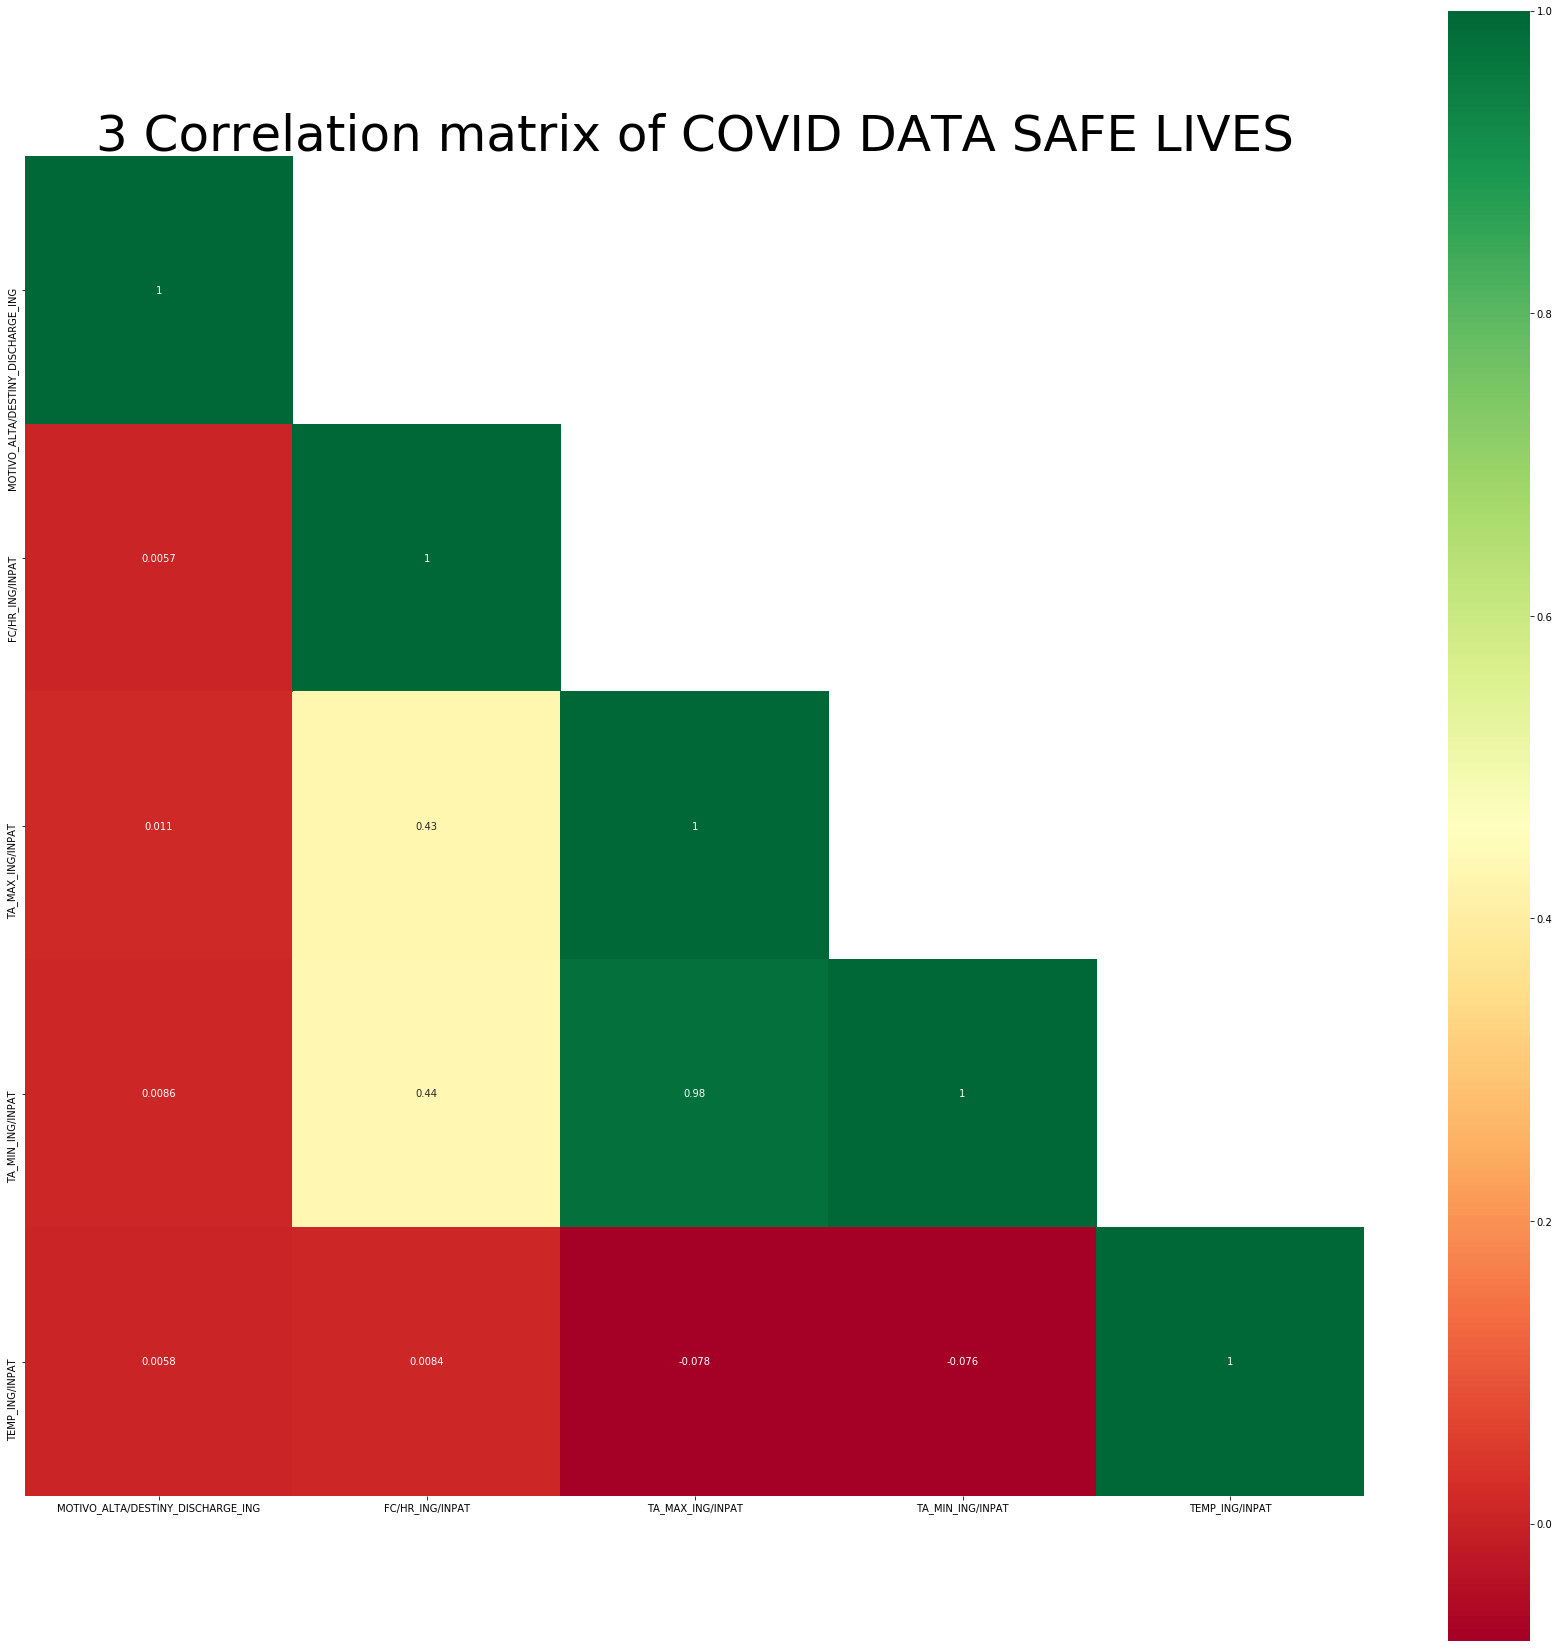

In [212]:
plt.figure(figsize=(30,30))
sns.heatmap(cp.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(cp.corr(), k=1))
plt.title("3 Correlation matrix of COVID DATA SAFE LIVES",fontsize=50)
plt.show()

It was to be expected to have a relationship between minimum and maximum temperature.

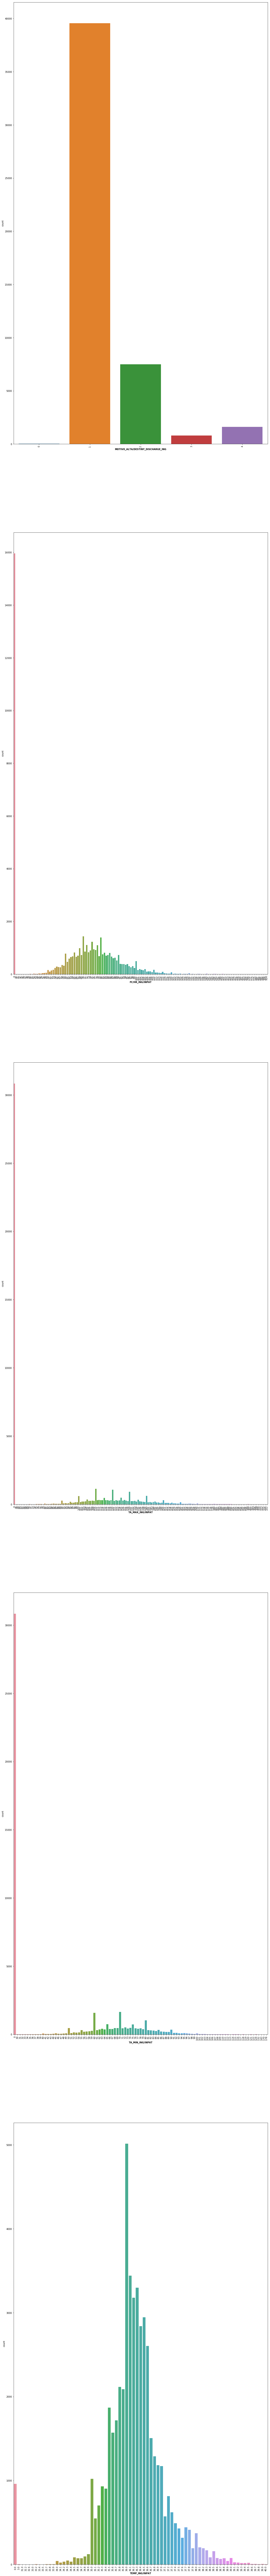

In [213]:
col_numeric = list(cp.select_dtypes(exclude="object"))
# visualizing the other categorical variables
plt.figure(figsize=(20,250))
for i,col in enumerate(col_numeric, start=1):
    plt.subplot(6,1,i)
    plt.xticks(rotation=90)
    sns.countplot(cp[col])
    plt.xlabel(col, fontsize=10,fontweight="bold")
plt.show()

To better visualize some values ​​of the graphs we are going to see the largest occurrences

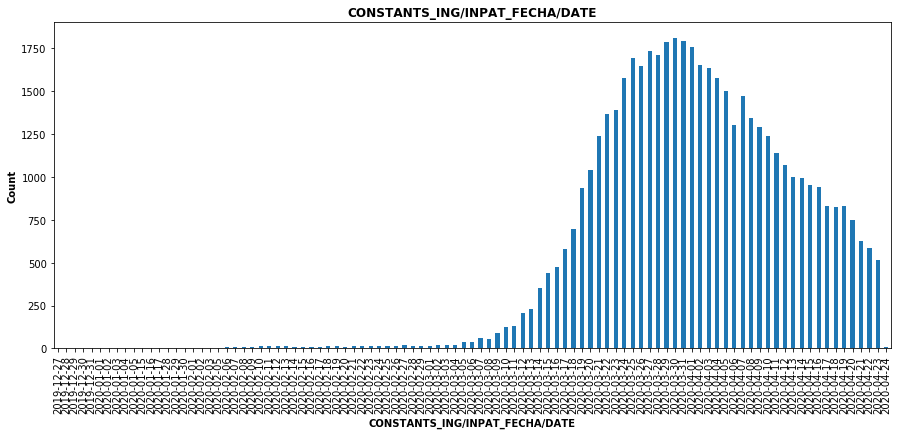

In [214]:
# visualizing the CONSTANTS_ING/INPAT_FECHA/DATE
plt.figure(figsize=(15,6))
cp["CONSTANTS_ING/INPAT_FECHA/DATE"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=90)
plt.xlabel("CONSTANTS_ING/INPAT_FECHA/DATE", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("CONSTANTS_ING/INPAT_FECHA/DATE", fontweight="bold")
plt.show()

Podemos visualizar que a medida que avanza la pandemia hay menos registro signo de recuperacion(menos contagiados)

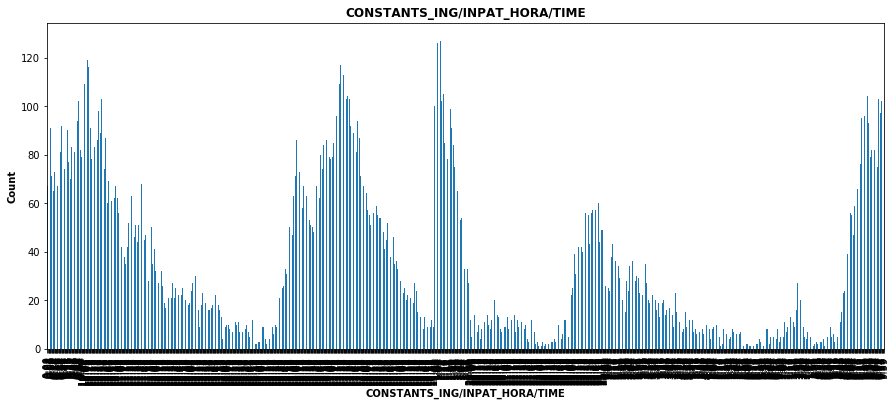

In [215]:
# visualizing the CONSTANTS_ING/INPAT_HORA/TIME
plt.figure(figsize=(15,6))
cp["CONSTANTS_ING/INPAT_HORA/TIME"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=90)
plt.xlabel("CONSTANTS_ING/INPAT_HORA/TIME", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("CONSTANTS_ING/INPAT_HORA/TIME", fontweight="bold")
plt.show()

We see many peaks for what we interpret as shifts for taking the sample (improvement: visualize if of these samples there could be some with deceased discharge that were not sampled in time, which leads to a late response in the medication administered)

In [216]:
for col_name in cp.columns:
    print(cp[col_name].value_counts(normalize=True).head(10) * 100)

1    79.911093
2    15.134371
4     3.265306
3     1.608406
0     0.080824
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-30    3.659325
2020-03-31    3.622954
2020-03-29    3.604769
2020-04-01    3.556274
2020-03-27    3.501718
2020-03-28    3.457264
2020-03-25    3.424934
2020-04-02    3.334007
2020-03-26    3.321883
2020-04-03    3.301677
Name: CONSTANTS_ING/INPAT_FECHA/DATE, dtype: float64
10:09    0.258638
17:21    0.256617
17:28    0.256617
1:10     0.256617
1:05     0.254597
1:11     0.250556
1:09     0.246514
17:19    0.244494
10:06    0.242473
1:07     0.240453
Name: CONSTANTS_ING/INPAT_HORA/TIME, dtype: float64
0     32.246919
70     2.901596
80     2.812689
75     2.473227
72     2.236816
78     2.216609
68     1.982219
76     1.899374
77     1.846838
74     1.808446
Name: FC/HR_ING/INPAT, dtype: float64
0      62.307537
110     2.271166
120     2.166094
130     1.834714
140     1.234593
100     1.202263
125     0.965852
115     0.951707
105     0.705193
135

FC/HR_ING/INPAT: rondando los valores normales.

TA_MAX_ING/INPAT: hay poco sistólico.

TA_MIN_ING/INPAT: N

TEMP_ING/INPAT: N

In [217]:
s_filter = cp['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']<2
e_filter =(cp['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==3 )+ (cp['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==4)
f_filter = cp['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==2

In [218]:
for col_name in cp[s_filter].columns:
    print(cp[s_filter][col_name].value_counts(normalize=True).head(10) * 100)

1    99.898959
0     0.101041
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-30    3.642518
2020-03-31    3.637466
2020-03-29    3.604628
2020-04-01    3.604628
2020-03-27    3.526321
2020-03-28    3.415176
2020-04-02    3.364656
2020-03-25    3.344448
2020-04-03    3.339396
2020-03-26    3.316662
Name: CONSTANTS_ING/INPAT_FECHA/DATE, dtype: float64
17:21    0.265232
17:27    0.260180
17:28    0.252602
10:06    0.247550
10:05    0.247550
17:20    0.247550
1:11     0.247550
1:05     0.245024
10:07    0.245024
1:07     0.245024
Name: CONSTANTS_ING/INPAT_HORA/TIME, dtype: float64
0     32.613418
70     2.897343
80     2.831666
75     2.467920
72     2.230474
78     2.220370
68     1.970294
77     1.849045
76     1.821259
74     1.793473
Name: FC/HR_ING/INPAT, dtype: float64
0      62.609882
110     2.286046
120     2.182480
130     1.838941
100     1.174598
140     1.134182
125     0.975043
115     0.944731
105     0.714863
135     0.649187
Name: TA_MAX_ING/INPAT, dtype: 

CONSTANTS_ING/INPAT_HORA/TIME: top 3 tendencia a las 17:00 

In [219]:
for col_name in cp[e_filter].columns:
    print(cp[e_filter][col_name].value_counts(normalize=True).head(10) * 100)

4    66.998342
3    33.001658
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-28    4.477612
2020-03-25    4.477612
2020-03-30    4.394693
2020-03-31    4.270315
2020-03-29    4.145937
2020-03-27    3.897181
2020-03-26    3.814262
2020-03-24    3.814262
2020-03-23    3.565506
2020-03-22    3.399668
Name: CONSTANTS_ING/INPAT_FECHA/DATE, dtype: float64
1:06     0.456053
9:56     0.456053
10:23    0.456053
10:10    0.414594
10:08    0.414594
1:03     0.373134
9:20     0.373134
17:31    0.373134
9:53     0.373134
0:20     0.373134
Name: CONSTANTS_ING/INPAT_HORA/TIME, dtype: float64
0     33.540630
70     2.694859
75     2.529022
76     2.404643
77     2.280265
72     2.238806
65     2.197347
68     2.197347
78     2.072968
71     2.031509
Name: FC/HR_ING/INPAT, dtype: float64
0      63.018242
120     1.782753
130     1.658375
110     1.616915
140     1.533997
115     0.912106
145     0.912106
135     0.870647
125     0.829187
116     0.787728
Name: TA_MAX_ING/INPAT, dtype: 

MOTIVO_ALTA/DESTINY_DISCHARGE_ING: mayoría 66,99% alta TRASLADO A HOSPITAL.

CONSTANTS_ING/INPAT_HORA/TIME: alrededor de las 10:00 hay mayor tendencia.

TA_MAX_ING/INPAT & TA_MIN_ING/INPAT: ambos aumenta relativamente.

In [220]:
for col_name in cp[f_filter].columns:
    print(cp[f_filter][col_name].value_counts(normalize=True).head(10) * 100)

2    100.0
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
2020-03-25    3.511348
2020-03-30    3.511348
2020-03-29    3.431242
2020-03-28    3.351135
2020-04-01    3.351135
2020-03-31    3.337784
2020-04-03    3.284379
2020-03-27    3.244326
2020-03-26    3.190921
2020-04-02    3.177570
Name: CONSTANTS_ING/INPAT_FECHA/DATE, dtype: float64
1:10     0.333778
10:09    0.333778
1:05     0.320427
1:09     0.307076
10:00    0.307076
17:14    0.307076
1:06     0.307076
17:13    0.293725
1:03     0.293725
17:30    0.293725
Name: CONSTANTS_ING/INPAT_HORA/TIME, dtype: float64
0     29.893191
70     2.990654
80     2.963952
75     2.483311
72     2.269693
78     2.242991
76     2.149533
68     1.975968
74     1.895861
71     1.802403
Name: FC/HR_ING/INPAT, dtype: float64
0      60.480641
110     2.403204
120     2.202937
130     1.869159
140     1.668892
100     1.562083
115     1.001335
125     0.961282
135     0.761015
119     0.720961
Name: TA_MAX_ING/INPAT, dtype: float64
0     60.50

CONSTANTS_ING/INPAT_HORA/TIME: sobre las 1:00 hay mayor tendencia.

## Creating Dependent and Independent Variables

In [221]:
cp.drop(['CONSTANTS_ING/INPAT_FECHA/DATE','CONSTANTS_ING/INPAT_HORA/TIME'],axis=1, inplace=True)
cp.applymap(str)
cp.applymap(str).iloc[0,0]
cp = cp.applymap(str)
X = cp.drop(['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'],axis=1)
test_features = X.columns.to_list()
# dependent variable
y = cp['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']    

## Splitting data into train test data

In [222]:
# splitting into train and test data
# I will train using 90% of the data to enhanced accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Modelling

## Decision Trees

In [223]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Decision Tree Classifier Training Accuracy:', score,'%')

Decision Tree Classifier Training Accuracy: 74.43928066276015 %


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.065305 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.065305 to fit



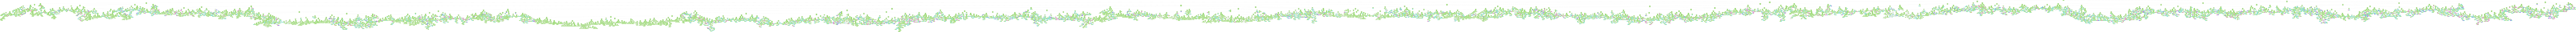

In [224]:
tree.export_graphviz(model, out_file = '3covid_decisiontree.dot')
dotfile = StringIO()
tree.export_graphviz(model, out_file=dotfile,filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all')
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png('3covid_tree.png')
Image(graph.create_png())

## Random Forest Classifier

In [225]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Random Forest Classifier Training Accuracy:', score,'%')

Random Forest Classifier Training Accuracy: 79.28874520105072 %


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0908914 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0908914 to fit



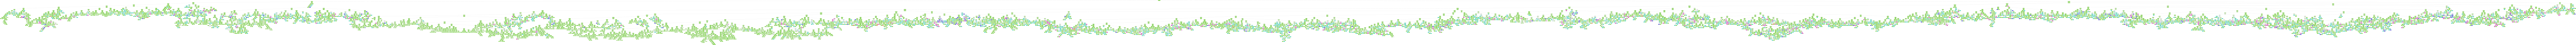

In [226]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all', special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('3covid_forest.png')
Image(graph.create_png())